In [ ]:
!git clone https://github.com/hirokiyokoyama/tf-renderer.git
!pip install tensorflow-addons tensorflow-graphics
import sys
sys.path.append('tf-renderer')

In [ ]:
!wget http://paulbourke.net/dataformats/obj/capsule.obj.zip
!unzip capsule.obj.zip
!wget http://paulbourke.net/dataformats/obj/capsule0.jpg

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


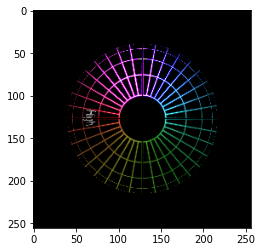

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tf_renderer

camera = tf_renderer.PerspectiveCamera(tf.constant([128., 128.], tf.float32), tf.constant([128., 128.], tf.float32), fov=30.)
renderer = tf_renderer.Renderer(camera, [256,256])
light = tf_renderer.PointLight(tf.constant([100., 100., 100.], tf.float32), tf.constant([0., 1., -4.], tf.float32))

trimesh = tf_renderer.Trimesh.from_obj('capsule.obj', 'capsule0.jpg')
trimesh.face_groups = [tf.range(0, 5100), tf.range(5100, 10200)]
#trimesh.vertices = tf.gather(trimesh.vertices, [2,0,1], axis=-1)
trimesh.vertices += tf.constant([0., 0., -6.], dtype=tf.float32)

image, valid = renderer.render(trimesh, light, ambient_light=0.5)
plt.imshow(image * tf.cast(valid[...,tf.newaxis], tf.float32))